<a href="https://colab.research.google.com/github/vishalpanchange/Data-Science/blob/main/Assignement_16_Neural_Networks_%5BForest_Fires%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
forest_data = pd.read_csv('/content/forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


Initial analysis:

In [ ]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
forest_data.shape

(517, 31)

In [ ]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

Drop duplicate values:

In [ ]:
forest_data[forest_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest_data_1 = forest_data.drop_duplicates()
forest_data_1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest_data_2 = forest_data_1.drop(forest_data.columns[10:30], axis = 1)
forest_data_2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


In [ ]:
forest_data_2.shape

(509, 11)

Label Encoder


In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [ ]:
forest_data_2['size_category'] = label_encoder.fit_transform(forest_data_2['size_category'])

In [ ]:
forest_data_2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


Converting catergorical values of days and mothsinto into integers :


In [ ]:
forest_data_2.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                    (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
forest_data_2.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace = True)


In [ ]:
forest_data_2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


Correlation Matrix :

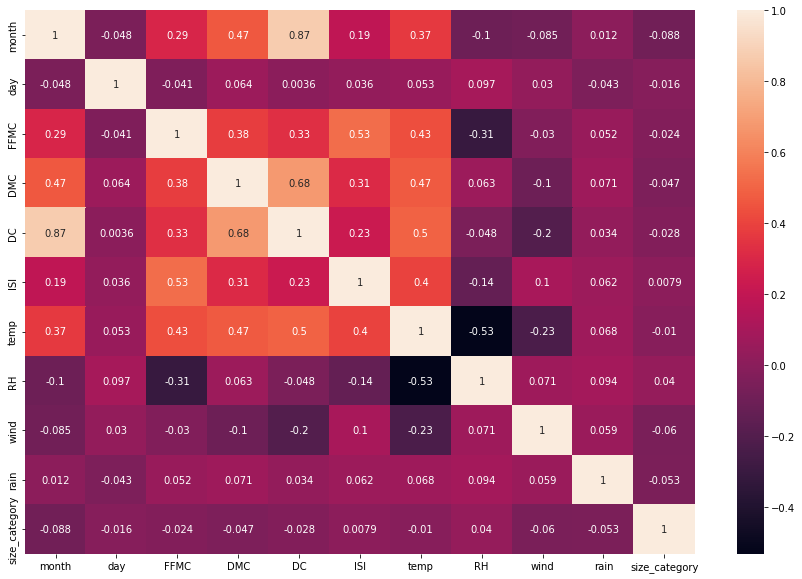

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(forest_data_2.corr(),annot = True)
plt.show()

Visualization using distplot :

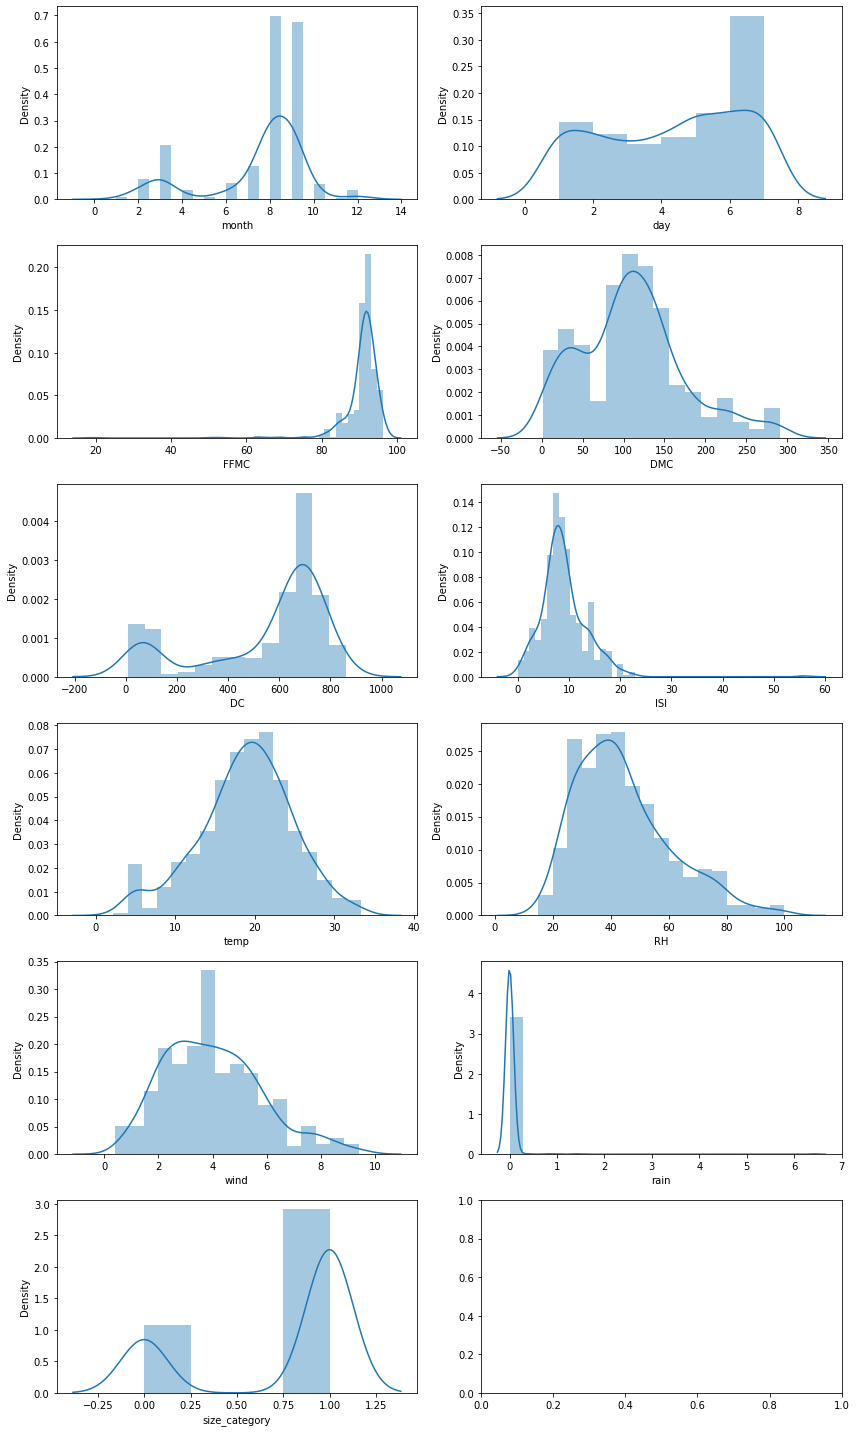

In [ ]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.distplot(forest_data_2.month, ax = ax[0,0])
sns.distplot(forest_data_2.day, ax = ax[0,1])
sns.distplot(forest_data_2.FFMC, ax = ax[1,0])
sns.distplot(forest_data_2.DMC, ax = ax[1,1])
sns.distplot(forest_data_2.DC, ax = ax[2,0])
sns.distplot(forest_data_2.ISI, ax = ax[2,1])
sns.distplot(forest_data_2.temp, ax = ax[3,0])
sns.distplot(forest_data_2.RH, ax = ax[3,1])
sns.distplot(forest_data_2.wind, ax = ax[4,0])
sns.distplot(forest_data_2.rain, ax = ax[4,1])
sns.distplot(forest_data_2['size_category'], ax = ax[5,0])

plt.tight_layout()
plt.show()

Checking of the outlier :

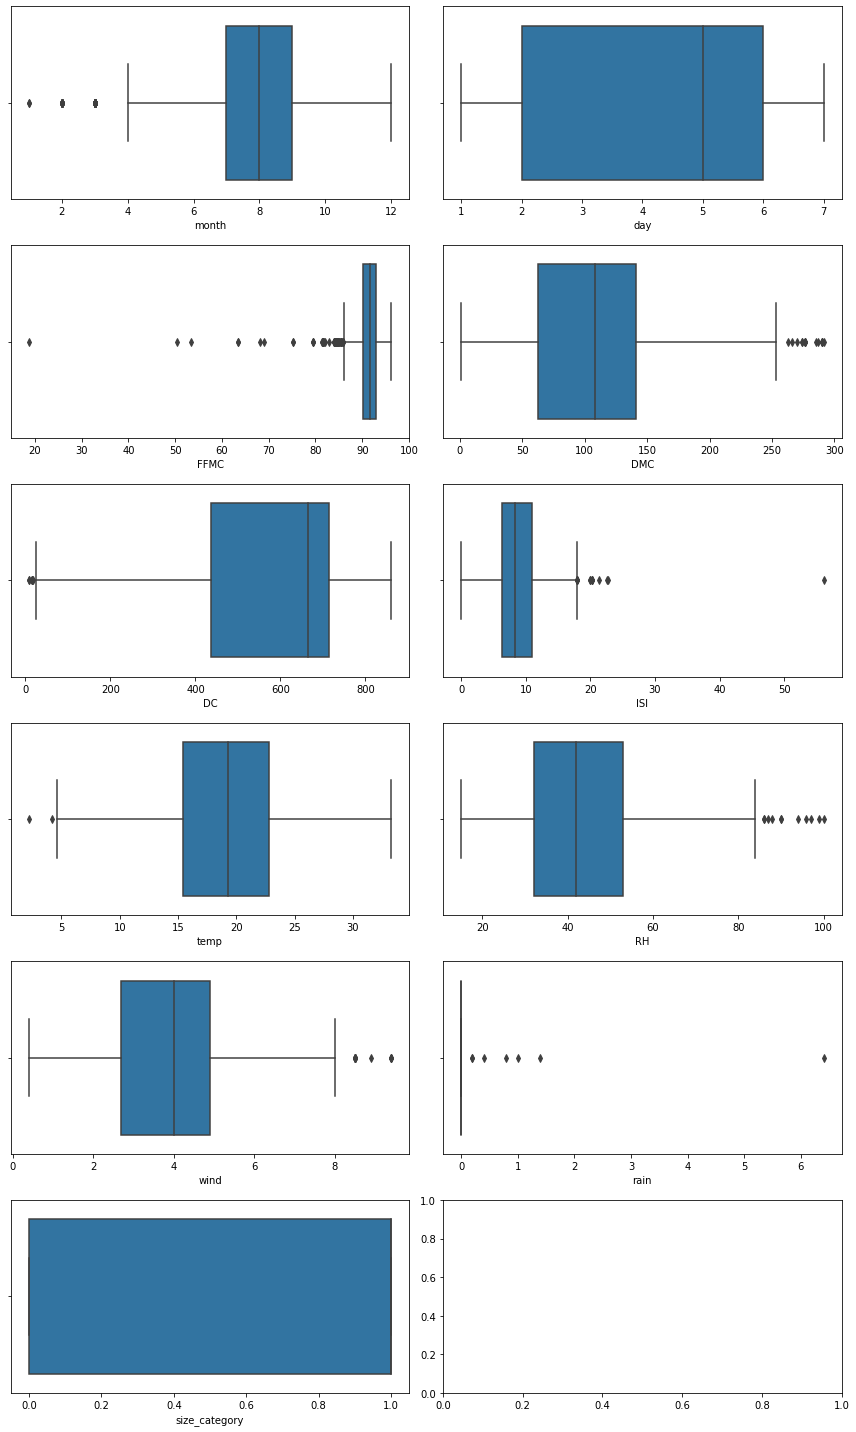

In [ ]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.boxplot(forest_data_2.month, ax = ax[0,0])
sns.boxplot(forest_data_2.day, ax = ax[0,1])
sns.boxplot(forest_data_2.FFMC, ax = ax[1,0])
sns.boxplot(forest_data_2.DMC, ax = ax[1,1])
sns.boxplot(forest_data_2.DC, ax = ax[2,0])
sns.boxplot(forest_data_2.ISI, ax = ax[2,1])
sns.boxplot(forest_data_2.temp, ax = ax[3,0])
sns.boxplot(forest_data_2.RH, ax = ax[3,1])
sns.boxplot(forest_data_2.wind, ax = ax[4,0])
sns.boxplot(forest_data_2.rain, ax = ax[4,1])
sns.boxplot(forest_data_2['size_category'], ax = ax[5,0])

plt.tight_layout()
plt.show()

Extrating the independent and dependent variables

In [ ]:
x = forest_data_2.iloc[:,0:10].values
x

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [ ]:
y = forest_data_2.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

NOrmalizing data:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_norm = norm_func(x)

Data spliting:

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y, test_size = 0.2,stratify = y)


Applying neural network

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras.models
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
seed = 7
np.random.seed(seed)

In [ ]:
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))


In [ ]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train, validation_split = 0.33, epochs = 100, batch_size = 10)

Epoch 1/100
28/28 [==============================] - 1s 11ms/step - loss: 0.7284 - accuracy: 0.2500 - val_loss: 0.6461 - val_accuracy: 0.3111
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.2500 - val_loss: 0.5929 - val_accuracy: 0.3111
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.2500 - val_loss: 0.5157 - val_accuracy: 0.3111
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.2500 - val_loss: 0.4119 - val_accuracy: 0.3111
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.2500 - val_loss: 0.3032 - val_accuracy: 0.3111
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.2682 - accuracy: 0.4265 - val_loss: 0.2379 - val_accuracy: 0.6000
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.6985 - val_loss: 0.2222 - val_accuracy: 0.6889
Epoch 8/100


In [ ]:
scores1 = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores1[1]*100))

13/13 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.7297
accuracy: 72.97%


In [ ]:
scores2 = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores2[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.7255
accuracy: 72.55%


Visualize training history:

In [ ]:
history = model.fit(x_train,y_train, validation_split = 0.33, epochs = 100, batch_size = 10)

Epoch 1/100
28/28 [==============================] - 0s 7ms/step - loss: 0.1868 - accuracy: 0.7500 - val_loss: 0.2206 - val_accuracy: 0.6889
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 0.1870 - accuracy: 0.7500 - val_loss: 0.2196 - val_accuracy: 0.6889
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.1872 - accuracy: 0.7500 - val_loss: 0.2204 - val_accuracy: 0.6889
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 0.1871 - accuracy: 0.7500 - val_loss: 0.2192 - val_accuracy: 0.6889
Epoch 5/100
28/28 [==============================] - 0s 6ms/step - loss: 0.1874 - accuracy: 0.7500 - val_loss: 0.2216 - val_accuracy: 0.6889
Epoch 6/100
28/28 [==============================] - 0s 6ms/step - loss: 0.1869 - accuracy: 0.7500 - val_loss: 0.2209 - val_accuracy: 0.6889
Epoch 7/100
28/28 [==============================] - 0s 8ms/step - loss: 0.1868 - accuracy: 0.7500 - val_loss: 0.2190 - val_accuracy: 0.6889
Epoch 8/100
2

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

summarize history for accuracy and Loss :

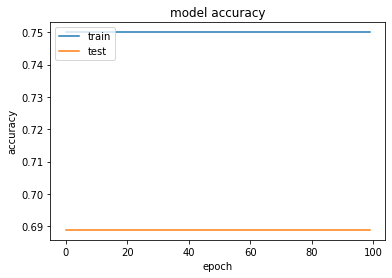

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

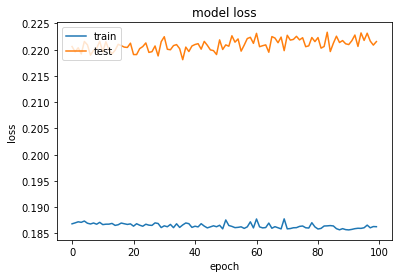

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

Tuning of Hyperparameter : Batch Size and Epochs

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

    adam = Adam(lr = 0.01)
    model.compile(loss = 'mse', optimizer = adam, metrics = ['accuracy'])
    return model

Create the model :

In [ ]:
model_1 = KerasClassifier(build_fn = create_model,verbose = 0)

Define the grid search parameters:

In [ ]:
batch_size = [10,20,40]
epochs = [10,50,100]

Make a dictionary of the grid search parameters :

In [ ]:
param_grid = dict(batch_size = batch_size,epochs = epochs)

Build and fit the GridSearchCV :

In [ ]:
grid = GridSearchCV(estimator = model_1, param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.817 total time=   1.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.720 total time=   1.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.691 total time=   1.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.741 total time=   1.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.679 total time=   1.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.741 total time=   0.8s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.679 total time=   0.8s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................
[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.817 total time=   2.3s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................
[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.720 total time=   1.9s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.691 total time=   1.9s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.741 total time=   1.9s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.679 total time=   1.3s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END ....batch_

Conclusion :



In [ ]:
print("For Train Model we got ",scores1[1]*100)
print("For Test Model we got ",scores2[1]*100)

For Train Model we got  72.972971200943
For Test Model we got  72.54902124404907
